# Contents

----

----

__This notebook investigates Breast Cancer prediction data derived from `Ming et al.` (Gail model)__ [1].

__Mondrian Conformal Prediction is applied to the Nonconformity Measure: `InverseProbability`.__

__Nonconformity Measure `InverseProbability` is applied to the underlying classifier: `LogisticRegression`.__

Using MCP, conditional on the category `Race`, we investigate the relationship between sample size and the equitable representation of individuals belonging to a given race that fall within the low-confidence region of predictions. The low-confidence region is defined as the Lower-Decile Region (LDR) of predictions, ranked by `confidence` and `credibility`, respectively.

----

###### 1. Ming C, Viassolo V, Probst-Hensch N, Chappuis PO, Dinov ID, Katapodi MC. Machine learning techniques for personalized breast cancer risk prediction: comparison with the BCRAT and BOADICEA models. Breast Cancer Research 2019;21(1):75 doi: 10.1186/s13058-019-1158-4[published Online First: Epub Date]|. 

----

In [1]:
#imports/pwd
import os

# set pwd to root of repository
repo_root = 'C:/Users/Bob/CHPC/conformal_prediction/vigilant-computing-machine/'
os.chdir(repo_root)

# 'vigilant-computing-machine/source/util.py'
import source.util as util
import matplotlib.pyplot as plt
import pandas as pd

----
__define plot function__

In [2]:
def plot_rep_6exp(exp_df_list):
    col = 2
    row = 3
    fig, axs = plt.subplots(row, col)
    fig.set_figheight(32)
    fig.set_figwidth(24)
    for i in range(row * col):
        row_idx = i // col
        col_idx = i % col
        util.plot_race_representation_from_experiment(exp_df_list[i], ax=axs[row_idx, col_idx])
    plt.show()

----
__define table function__

In [3]:
def get_exp_rep_table(exp):
    df = exp.loc[0, 'df']
    sample_size = len(df)

    n = df.Race.value_counts().sort_index()
    nr = n.values.sum()
    d = pd.DataFrame()
    d['all_race_n'] = n
    d['all_race'] = n / nr

    lc = util.get_low_confidence_predictions(df, 10)
    n = lc.Race.value_counts().sort_index()
    nr = n.values.sum()
    d['low_race_n'] = n
    d['low_race'] = n / nr
    d = d.fillna(0)
    d['low_race_n'] = d['low_race_n'].astype(int)
    return d

----
__read in experiment results__

In [4]:
experiments_rcic = \
    [     
     util.read_experiment('./results/logistic_regression_1200_balanced_race-conditional_experiment.csv'),
     util.read_experiment('./results/logistic_regression_12000_balanced_race-conditional_experiment.csv'),
     util.read_experiment('./results/logistic_regression_1200_race-unique_balanced_race-conditional_experiment.csv'),
     util.read_experiment('./results/logistic_regression_12000_race-unique_balanced_race-conditional_experiment.csv'),
     util.read_experiment('./results/logistic_regression_1200_race-unique-inverted_balanced_race-conditional_experiment.csv'),
     util.read_experiment('./results/logistic_regression_12000_race-unique-inverted_balanced_race-conditional_experiment.csv')
    ]

----
__review predictions' confidence/credibility distribution__

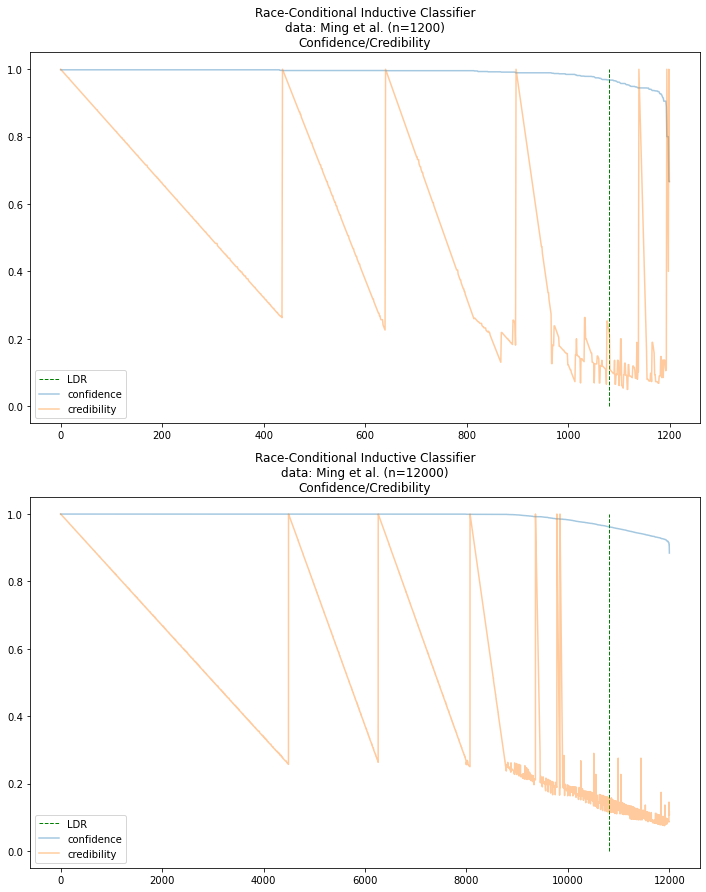

In [5]:
fig, axs = plt.subplots(2,1)
fig.set_figwidth(12)
fig.set_figheight(15)
axs[0].vlines(x=1200*.9, ymin=0, ymax=1, linestyle='--', label='LDR', color='g', linewidth=1)
util.plot_conf_cred(util.read_experiment('./results/logistic_regression_1200_balanced_race-conditional_experiment.csv').df[0], 
                    title='Race-Conditional Inductive Classifier\ndata: Ming et al. (n=1200)\nConfidence/Credibility', 
                    alpha=0.4, ax=axs[0], scale=False)
axs[0].legend()
axs[1].vlines(x=12000*.9, ymin=0, ymax=1, linestyle='--', label='LDR', color='g', linewidth=1)
util.plot_conf_cred(util.read_experiment('./results/logistic_regression_12000_balanced_race-conditional_experiment.csv').df[0], 
                    title='Race-Conditional Inductive Classifier\ndata: Ming et al. (n=12000)\nConfidence/Credibility', 
                    alpha=0.4, ax=axs[1], scale=False)
axs[1].legend()
print()

----
__review sample and Lower Decile Region (LDR) of predictions' (by confidence/credibility) race distribution__

In [6]:
# Ming et al. - n=1200 - race-conditional inductive classifier
get_exp_rep_table(experiments_rcic[0])

,all_race_n,all_race,low_race_n,low_race
0,589,0.490833,45,0.375000
1,234,0.195000,25,0.208333
2,260,0.216667,9,0.075000
3,94,0.078333,18,0.150000
4,17,0.014167,17,0.141667
5,4,0.003333,4,0.033333
6,2,0.001667,2,0.016667


In [7]:
# Ming et al. - n=12000 - race-conditional inductive classifier
get_exp_rep_table(experiments_rcic[1])

,all_race_n,all_race,low_race_n,low_race
0,6043,0.503583,567,0.472500
1,2397,0.199750,231,0.192500
2,2366,0.197167,284,0.236667
3,935,0.077917,72,0.060000
4,126,0.010500,16,0.013333
5,68,0.005667,17,0.014167
6,65,0.005417,13,0.010833


----
__plot experiment results__

- __Data__
    - __Ming et al.__
        - `n=1200`
        - `n=12000`
    - __Race-Unique Risk__
        - `n=1200`
        - `n=12000`
    - __Race-Unique Risk Inverted__
        - `n=1200`
        - `n=12000`
        
----

| |`n=1200` | `n=12000`|
--- | ---| ---| 
|__Ming et al.__ | 1xM | 10xM |
|__Race-Unique Risk__ | 1xRUR | 10xRUR |
|__R-U Risk Inverted__ | 1xRURI | 10xRURI |


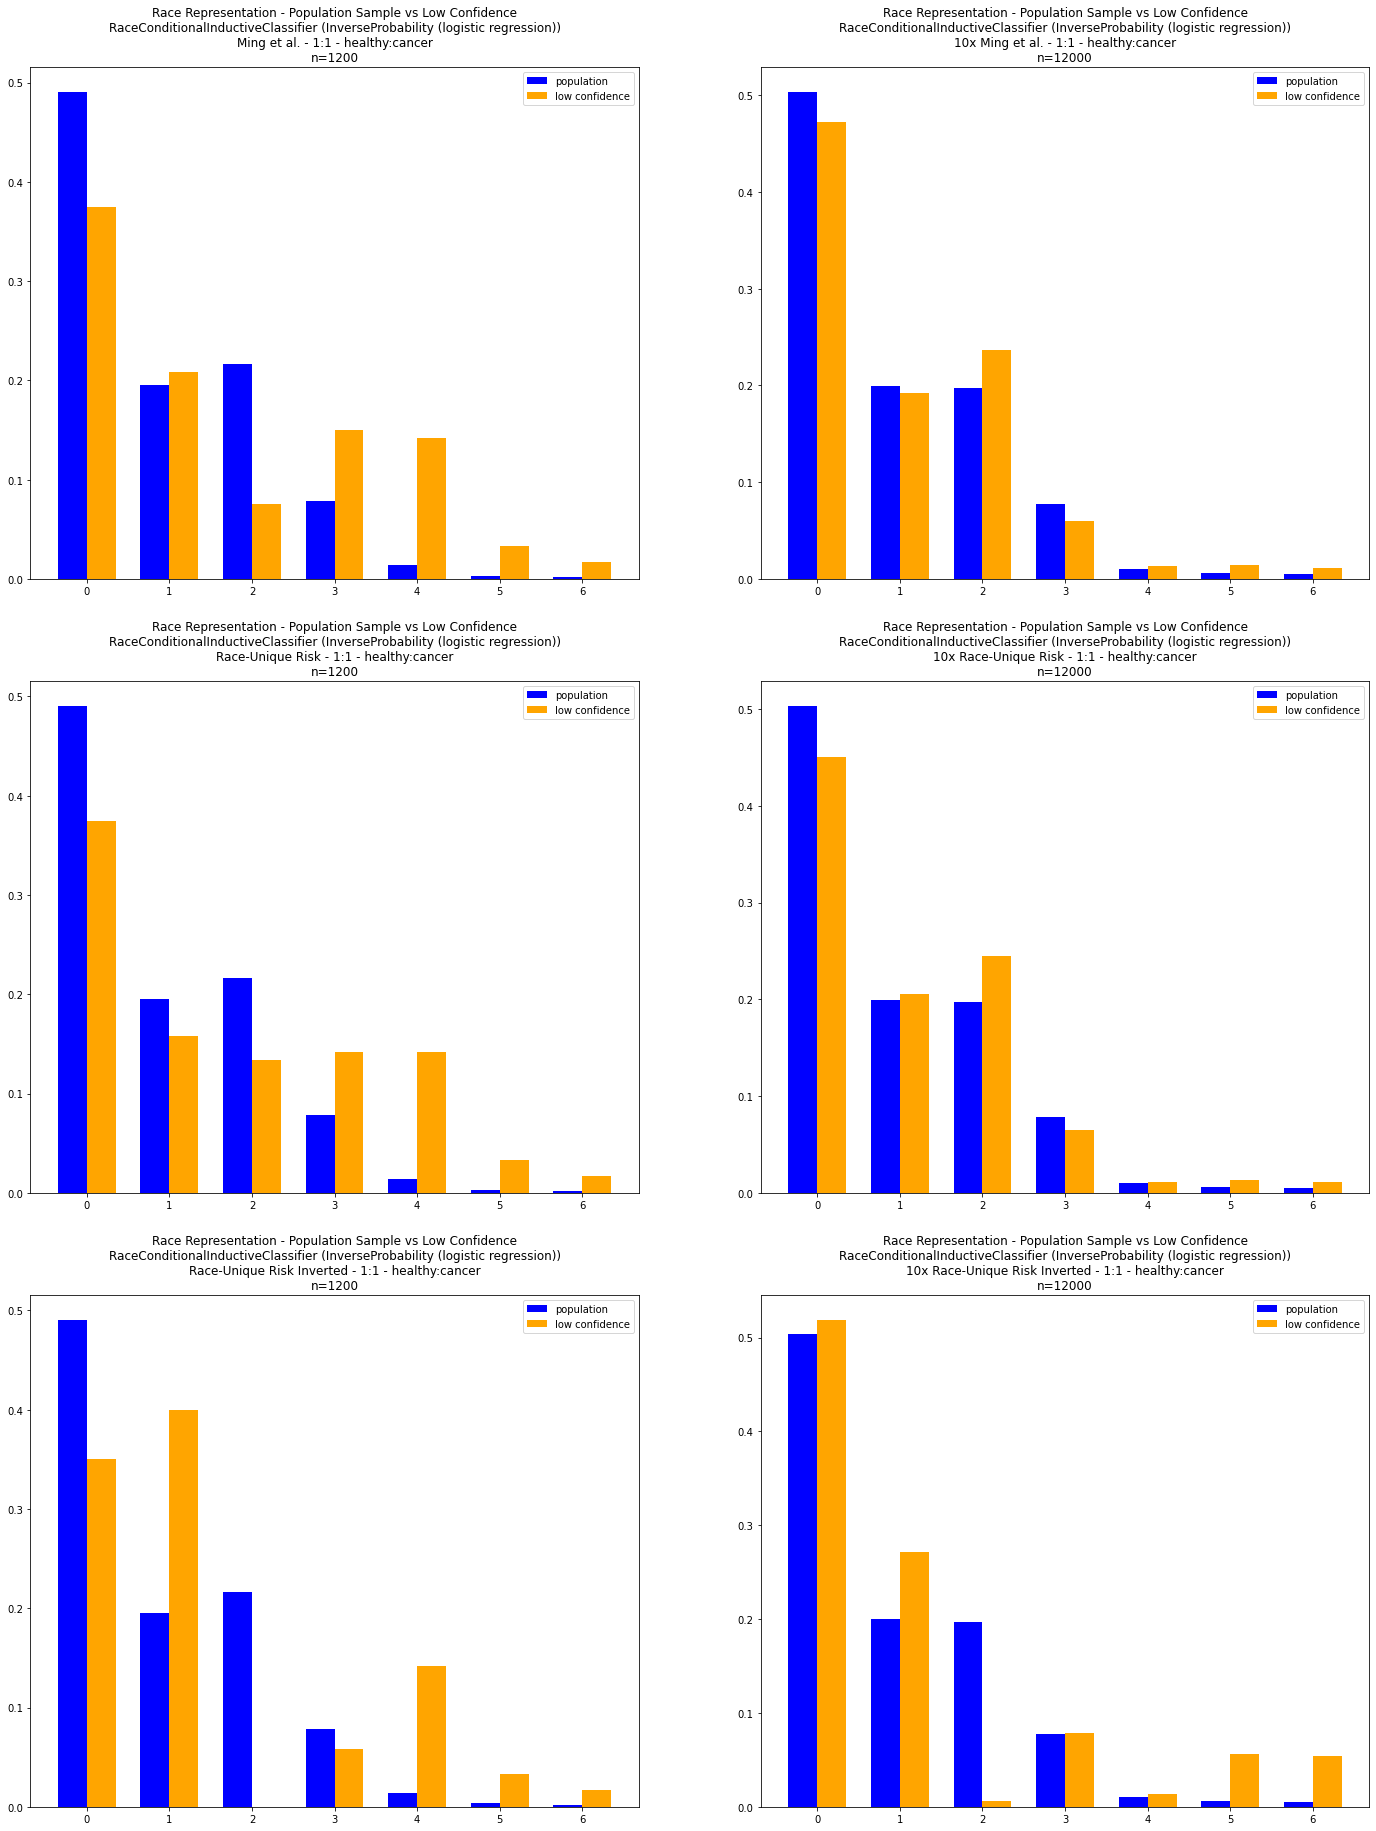

In [8]:
plot_rep_6exp(experiments_rcic)

__Cursory Observation:__

__Blind__ sample supplementation tends to either:
- drive equity of `Race` representation in the low-confidence region
- highlight `Race` group(s) where __reduced monetary expense__ may result from __targeted__ sample supplementation

----

__Preliminary Conclusions:__

CP methods may provide a means to determine the __minimum-viable sample__ size of individual groups that may otherwise be under-represented, or systematically excluded, helping __ensure equity__ in the results of __clinical biomedical research__ and __clinical predictive tools__.